<a href="https://colab.research.google.com/github/IlkaJean/ARMprograms/blob/master/milestone4/milestone4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install transformers

In [10]:
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
feature_extractor = SegformerFeatureExtractor(reduce_labels=True)
model = SegformerForSemanticSegmentation.from_pretrained("ChainYo/segformer-sidewalk")

Saving tile5.jpg to tile5 (1).jpg


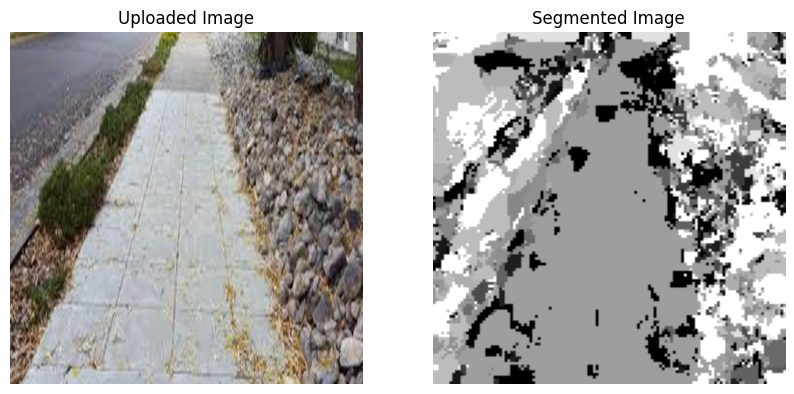

In [11]:
# Process the uploaded file
# Prompt user to upload a file
from google.colab import files
import io
from PIL import Image
import matplotlib.pyplot as plt
import torch

uploaded = files.upload()
for filename, file_content in uploaded.items():
    # Convert file content to a PIL image
    img = Image.open(io.BytesIO(file_content))
    img = img.resize((512, 512))  # Resize to model input size
    img = img.convert("RGB")

    # Extract features and preprocess the image
    inputs = feature_extractor(images=img, return_tensors="pt")

    # Perform sidewalk segmentation
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits  # shape (batch_size, num_labels, height/4, width/4)
        segmented_img = torch.argmax(logits, dim=1).squeeze().numpy()


    # Plot the uploaded image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Uploaded Image')
    plt.axis('off')

    # Plot the segmented image
    plt.subplot(1, 2, 2)
    plt.imshow(segmented_img, cmap='gray')
    plt.title('Segmented Image')
    plt.axis('off')

    plt.show()
